### Library 및 파일 불러오기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
import missingno as msno
import seaborn as sns

% matplotlib inline

UsageError: Line magic function `%` not found.


In [8]:
from os.path import join
train_path = join('data','train.csv')
test_path = join('data','test.csv')
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [2]:
train=pd.read_csv("C:/Users/yjp13/Desktop/houseprice/House Price.csv")

### 데이터 탐색 

In [3]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB


In [5]:
train.shape

(15035, 21)

In [6]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [7]:
correlation=train.corr()["price"]

In [8]:
correlation.sort_values(ascending=False)

price            1.000000
sqft_living      0.702899
grade            0.667211
sqft_above       0.608577
sqft_living15    0.586419
bathrooms        0.525479
view             0.400806
bedrooms         0.323672
sqft_basement    0.322218
lat              0.301604
waterfront       0.265738
floors           0.262588
yr_renovated     0.140808
sqft_lot         0.096793
sqft_lot15       0.086384
yr_built         0.047290
condition        0.039740
long             0.023547
id               0.020899
zipcode         -0.051498
Name: price, dtype: float64

In [9]:
correlation.sort_values(ascending=False)>0.3

price             True
sqft_living       True
grade             True
sqft_above        True
sqft_living15     True
bathrooms         True
view              True
bedrooms          True
sqft_basement     True
lat               True
waterfront       False
floors           False
yr_renovated     False
sqft_lot         False
sqft_lot15       False
yr_built         False
condition        False
long             False
id               False
zipcode          False
Name: price, dtype: bool

### 시각화 하기 위해서 Heatmap 사용

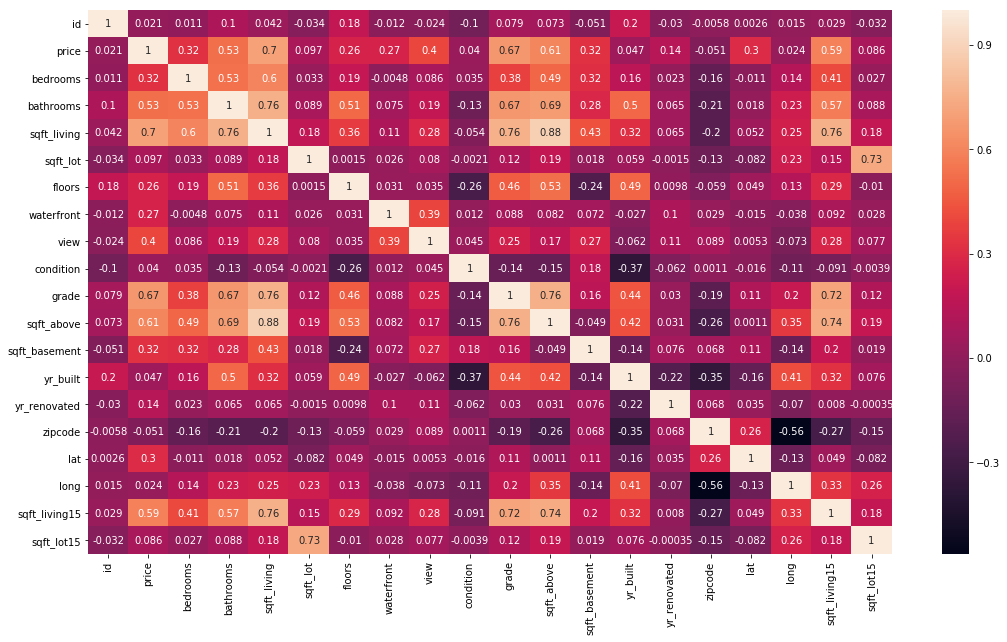

In [10]:
plt.figure(figsize=(18,10))
sns.heatmap(train.corr(),annot=True)

### Correlation이 0.3보다 높으면 서로 종속되어 있다고 판단할 수 있다.

### Feature Engineeirng
* renovated 여부 판단 변수
* total room 생성
* total sqft 생성

In [11]:
train["total_rooms"]=train["bedrooms"]+train["bathrooms"]
train["total_sqft"]=train["sqft_living"]+train["sqft_basement"]+train["sqft_above"]

In [12]:
reno_col=["yr_built","yr_renovated"]
train[reno_col].head()

,yr_built,yr_renovated
0,1955,0
1,1933,0
2,1987,0
3,1995,0
4,1963,0


In [14]:
train['is_renovated'] = train['yr_renovated'] - train['yr_built']
train['is_renovated'].astype(int)
train['is_renovated'].head()

0   -1955
1   -1933
2   -1987
3   -1995
4   -1963
Name: is_renovated, dtype: int64

In [15]:
train['is_renovated'] = train['is_renovated'].apply(lambda x: 0 if x<=0 else 1)

In [13]:
train['date']=train["date"].apply(lambda x: str(x[:6])).astype(str)

In [16]:
train["date"].head()

0    201410
1    201502
2    201502
3    201406
4    201501
Name: date, dtype: object

In [12]:
del train["id"]

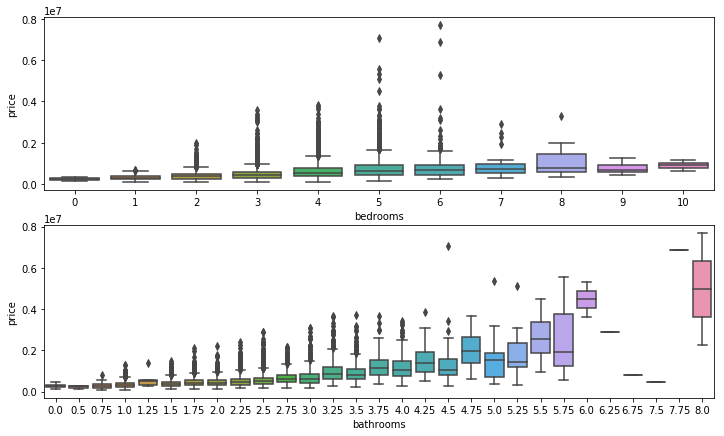

In [18]:
f, ax = plt.subplots(2,1, figsize=(12, 7))

fig=sns.boxplot(x='bedrooms', y="price", data=train, ax=ax[0])
fig1=sns.boxplot(x='bathrooms', y="price", data=train, ax=ax[1])

### 방과 집값이 많을 수록 집값 상승

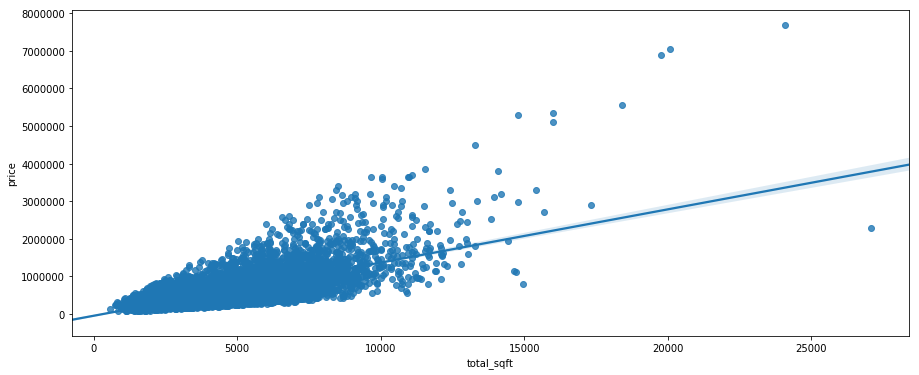

In [19]:
f, ax = plt.subplots(1,1,figsize=(15, 6))

sns.regplot(x='total_sqft', y="price", data=train)

In [20]:
count = 0
columns = train.columns
for row in columns:
    
    print("{}".format(row))
    print("output의 최빈값 :", train[row].mode()[0])
    print("output의 최대값 :", train[row].max())
    print()
    
    count+=1
  

date
output의 최빈값 : 201407
output의 최대값 : 201505

price
output의 최빈값 : 350000.0
output의 최대값 : 7700000.0

bedrooms
output의 최빈값 : 3
output의 최대값 : 10

bathrooms
output의 최빈값 : 2.5
output의 최대값 : 8.0

sqft_living
output의 최빈값 : 1660
output의 최대값 : 13540

sqft_lot
output의 최빈값 : 5000
output의 최대값 : 1651359

floors
output의 최빈값 : 1.0
output의 최대값 : 3.5

waterfront
output의 최빈값 : 0
output의 최대값 : 1

view
output의 최빈값 : 0
output의 최대값 : 4

condition
output의 최빈값 : 3
output의 최대값 : 5

grade
output의 최빈값 : 7
output의 최대값 : 13

sqft_above
output의 최빈값 : 1300
output의 최대값 : 9410

sqft_basement
output의 최빈값 : 0
output의 최대값 : 4130

yr_built
output의 최빈값 : 2014
output의 최대값 : 2015

yr_renovated
output의 최빈값 : 0
output의 최대값 : 2015

zipcode
output의 최빈값 : 98103
output의 최대값 : 98199

lat
output의 최빈값 : 47.5491
output의 최대값 : 47.7776

long
output의 최빈값 : -122.29
output의 최대값 : -121.315

sqft_living15
output의 최빈값 : 1540
output의 최대값 : 6210

sqft_lot15
output의 최빈값 : 5000
output의 최대값 : 871200

total_rooms
output의 최빈값 : 6.5
output의 최대값 : 1

### Feature 그래프로 표현
### 분포가 대칭을 벗어나 한쪽으로 치우친 것을 알 수 있음

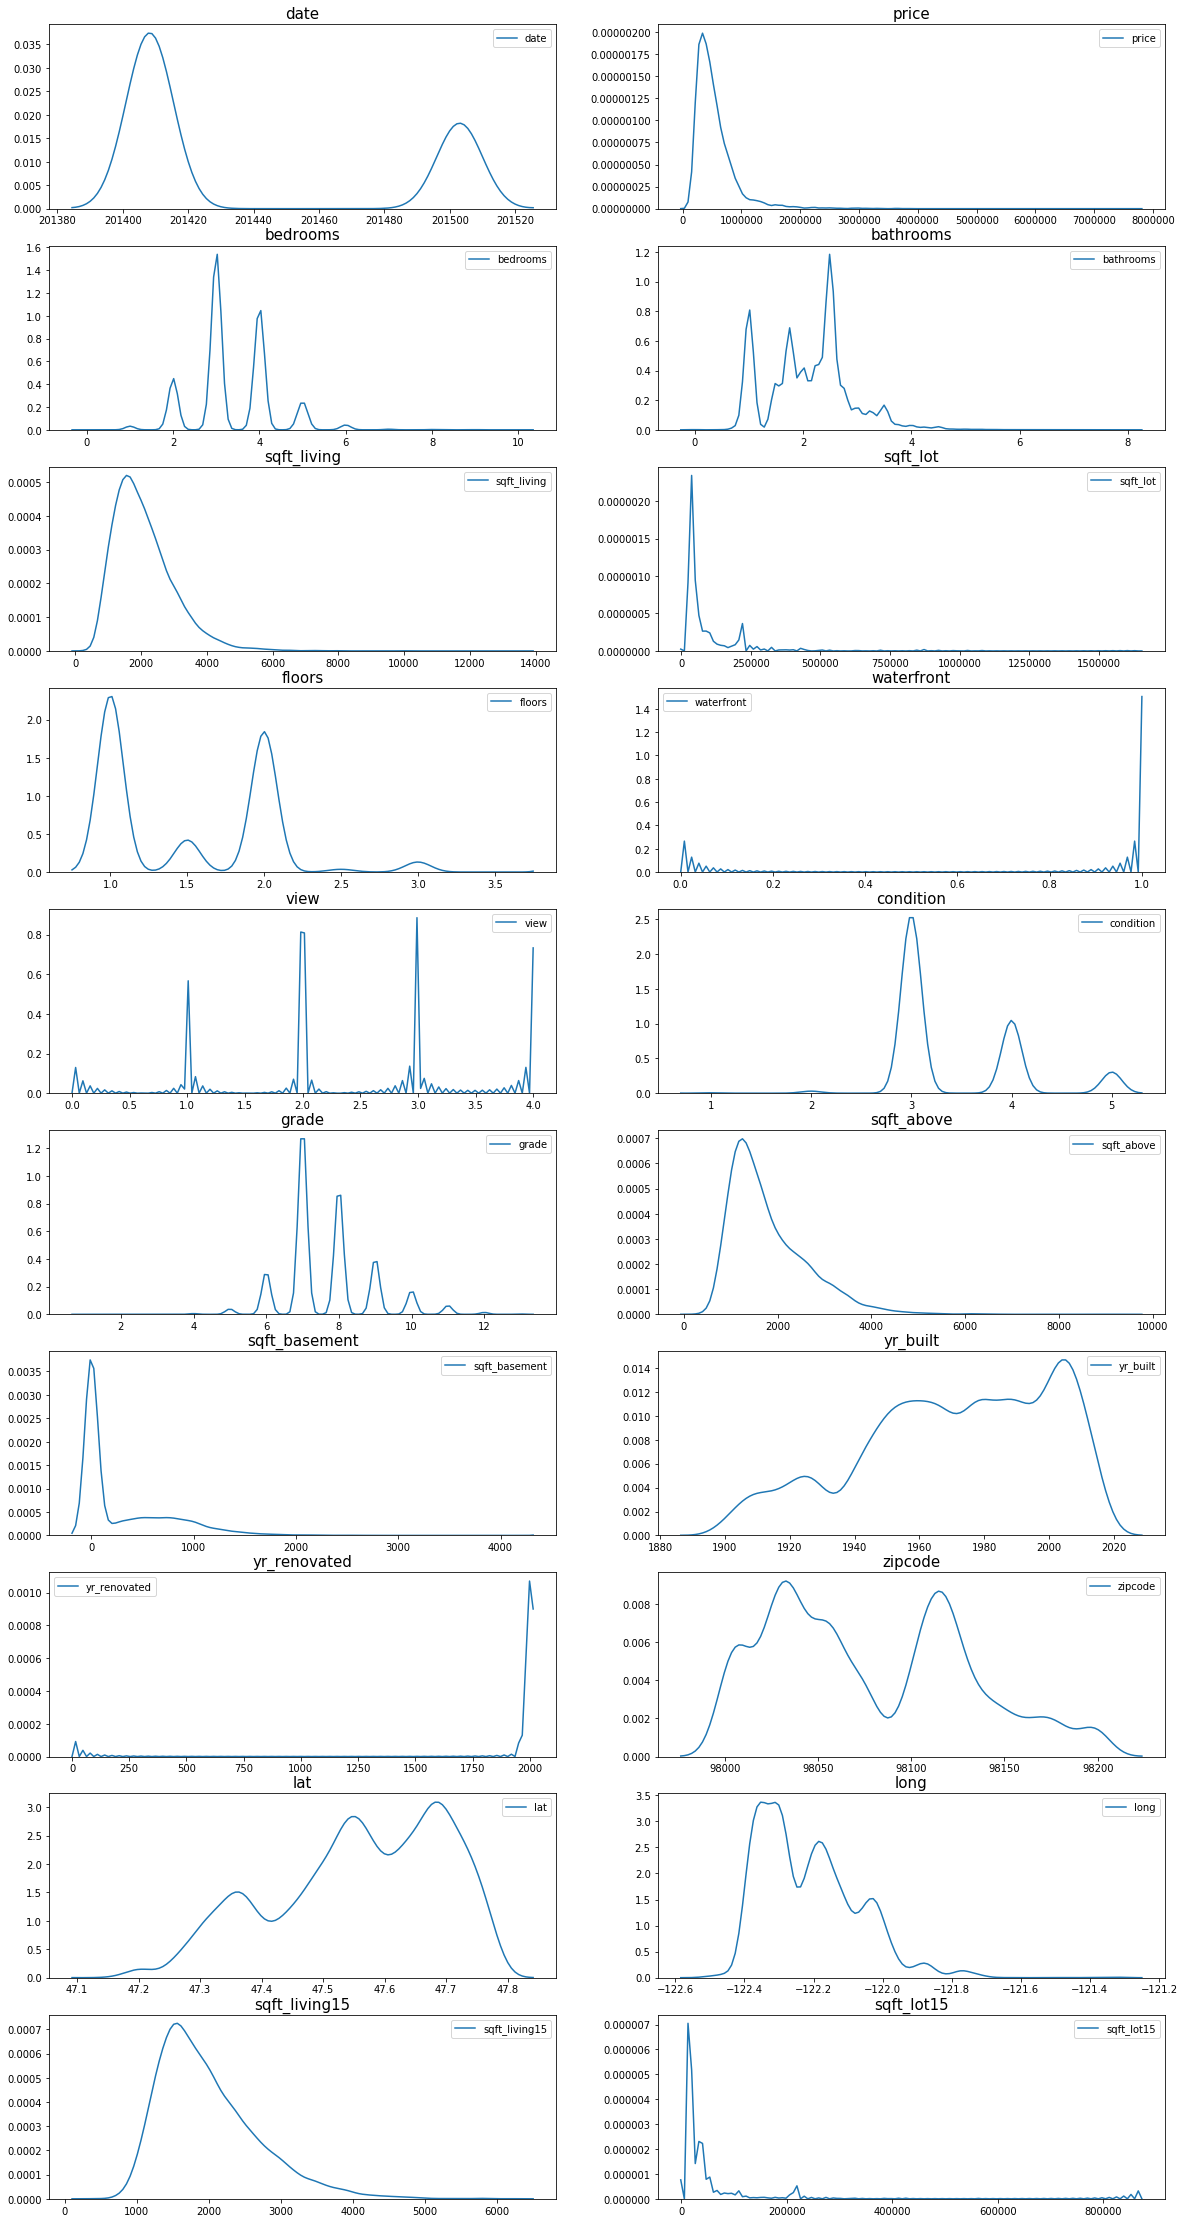

In [21]:
fig, ax = plt.subplots(10, 2, figsize=(20, 40))

count = 0
columns = train.columns
for row in range(10):
    for col in range(2):
        sns.kdeplot(train[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count+=1
  

In [22]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


X = train["sqft_living"]
y = train["price"]
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

C:\Users\yjp13\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 1.468e+04
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        00:58:43   Log-Likelihood:            -2.0904e+05
No. Observations:               15035   AIC:                         4.181e+05
Df Residuals:                   15033   BIC:                         4.181e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.944e+04   5326.031     -9.282      

* 정규화 전 skew value: 3.044

### 학습 성능을 향상시키기 위해서 그래프 정규화 

In [23]:
import numpy as np

In [24]:
skew = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','sqft_living15','sqft_lot15']
for i in skew:
    train[i] = np.log1p(train[i].values)

In [25]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = train["sqft_living"]
y = np.log(train["price"])

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                 1.275e+04
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        00:58:43   Log-Likelihood:                -7099.8
No. Observations:               15035   AIC:                         1.420e+04
Df Residuals:                   15033   BIC:                         1.422e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7086      0.056    119.284      

* 정규화 후 skew value : 0.144 
* skew가 -0.5 ~ 0.5 사이에 있으면 대칭분포임

### 그래프를 통해 대칭분포(symmetric distribution)로 바뀐것을 알수 있음

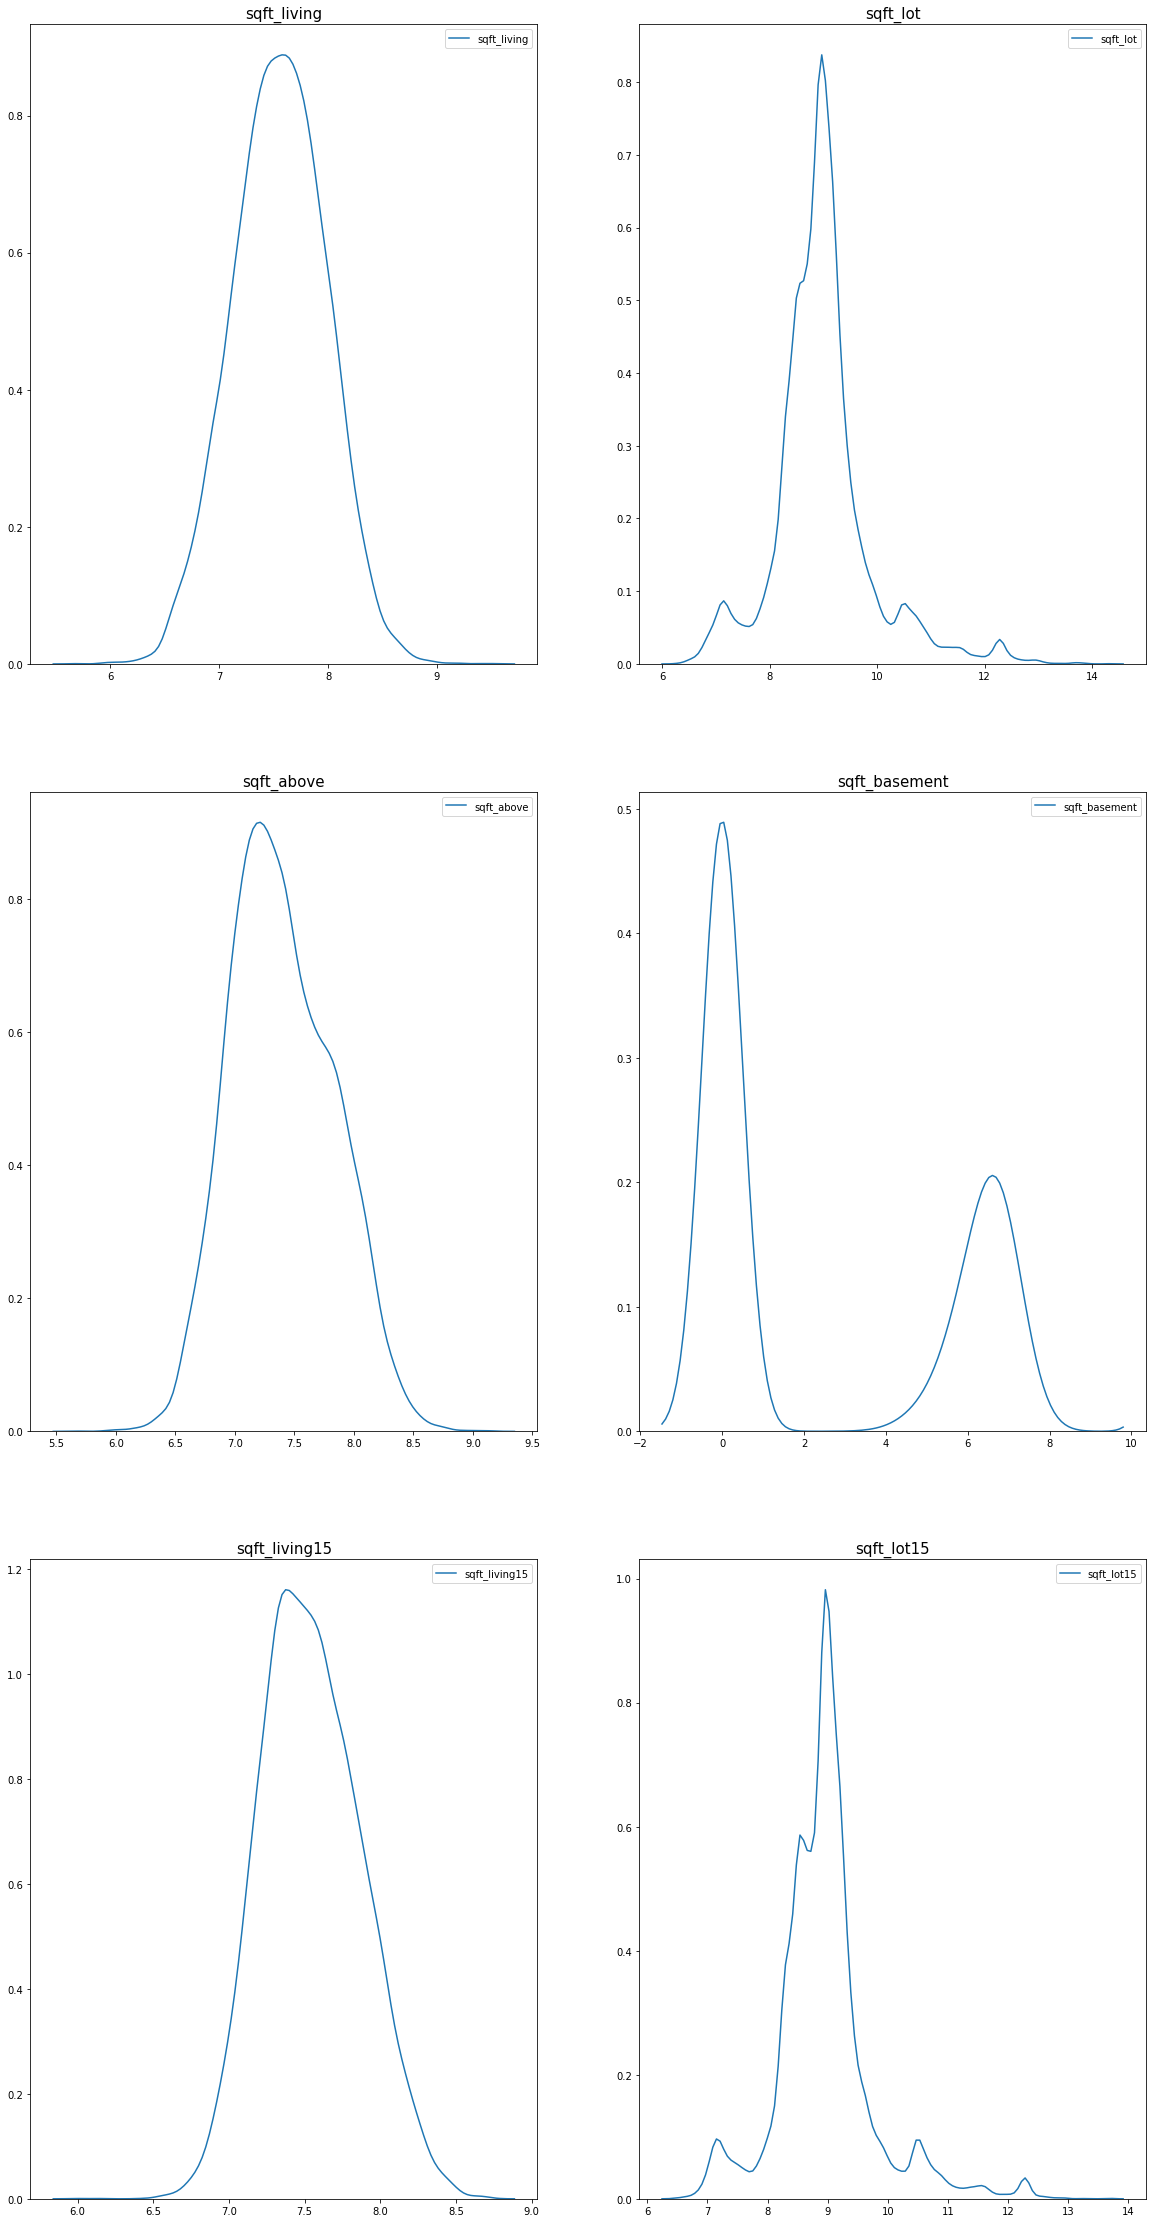

In [26]:
fig, ax = plt.subplots(3, 2, figsize=(20, 40))

count = 0
for row in range(3):
    for col in range(2):
        sns.kdeplot(train[skew[count]], ax=ax[row][col])
        ax[row][col].set_title(skew[count], fontsize=15)
        count+=1
  

In [27]:
train.shape

(15035, 23)

In [9]:
y=train["price"]

In [29]:
del train["price"]

In [30]:
y=np.log1p(y)

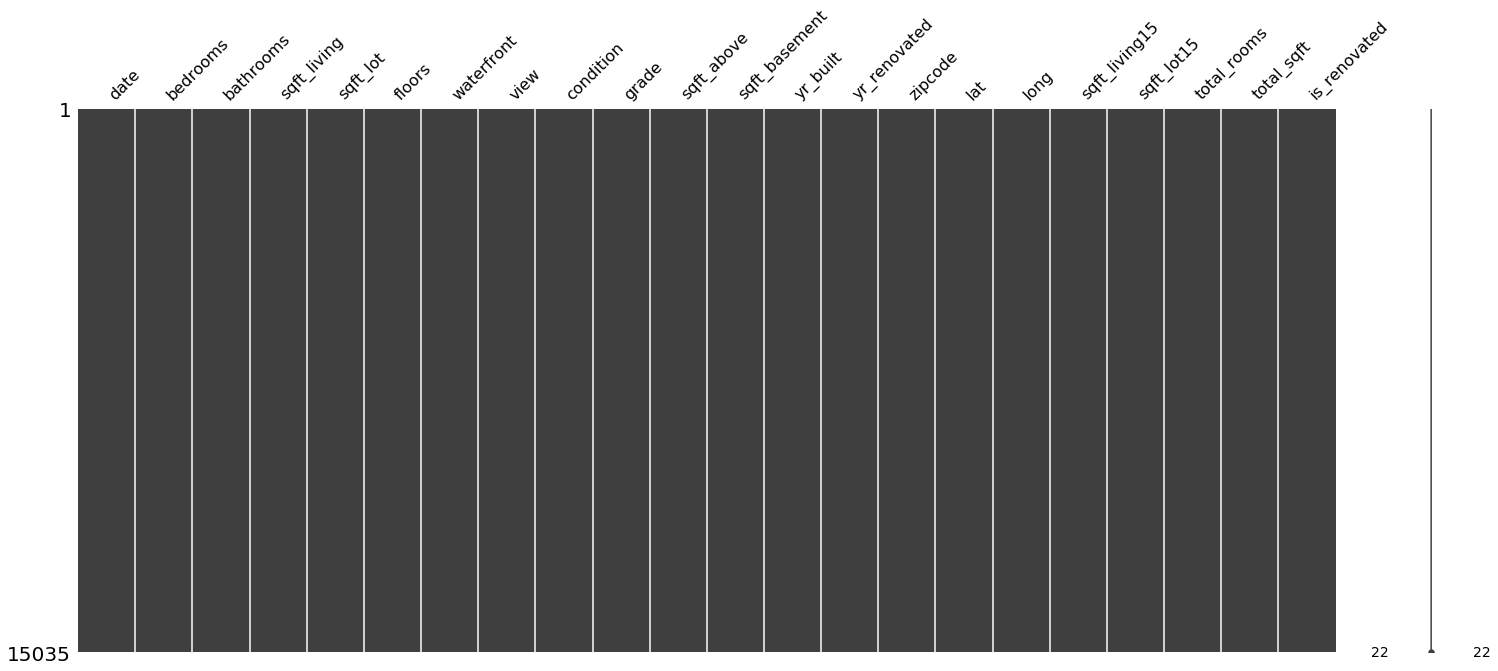

In [31]:
msno.matrix(train)

### Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf=RandomForestRegressor( random_state=2019)

In [34]:
X_train,X_test,y_train,y_test=train_test_split(train,y, random_state=2019)

In [35]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=2019, verbose=0, warm_start=False)

In [36]:
print("훈련 데이터셋 정확도 : {:.2f}".format(rf.score(X_train, y_train)))
print("테스트 데이터셋 정확도 : {:.2f}".format(rf.score(X_test, y_test)))

훈련 데이터셋 정확도 : 0.98
테스트 데이터셋 정확도 : 0.87


### Gradient Boosting Regressor

In [19]:
from sklearn.ensemble import GradientBoostingRegressor


In [20]:
gb=GradientBoostingRegressor(random_state=0)

In [21]:
X_train,X_test,y_train,y_test=train_test_split(train,y, random_state=2019)

In [22]:
gb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [23]:
print("훈련 데이터셋 정확도 : {:.2f}".format(gb.score(X_train, y_train)))
print("테스트 데이터셋 정확도 : {:.2f}".format(gb.score(X_test, y_test)))

훈련 데이터셋 정확도 : 1.00
테스트 데이터셋 정확도 : 1.00


### GridSearch + GradientBoosting

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
gbr=GradientBoostingRegressor()

In [27]:
param_grid={
    'n_estimators': [200, 250],
#     'max_features':['auto','log2'],
    'max_depth':[4,5,6]
}

#### 사이킷런 GBM 주요 하이퍼 파라미터 및 튜닝
- GradientBoostingClassifier
- loss : 경사하강법에서 사용할 비용 함수를 지정합니다. 특별한 이유가 없으면 기본값인 'deviance'를 그대로 적용합니다.
- learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률입니다. weak learner가 순차적으로 오류값을 보정해 나가는 데 적용하는 계수입니다. 0~1 사이의 값을 지정할 수 있으며 기본값은 0.1입니다. 너무 작은 값을 적용하면 업데이트되는 값이 작아져서 최소 오류 값을 찾아 예측 성능이 높아질 가능성이 높습니다. 하지만 많은 weak learner는 순차적인 반복이 필요해서 수행 시간이 오래 걸리고, 또 너무 작게 설정하면 모든 weak learner의 반복이 완료돼도 최소 오류 값을 찾지 못할 수 있습니다. 반대로 큰 값을 적용하면 최소 오류 값을 찾지 못하고 그냥 지나쳐 버려 예측 성능이 덜어질 가능성이 높아지지만, 빠른 수행이 가능합니다.
- n_estimators : weak learner의 개수입니다. weak learner가 순차적으로 오류를 보정하므로 개수가 많을수록 예측 성능이 일정 수준까지는 좋아질 수 있습니다. 하지만 개수가 많을수록 수행 시간이 오래 걸립니다. 기본값은 100입니다.
- subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율입니다. 기본값은 1이며, 이는 전체 학습 데이터를 기반으로 학습한다는 의미입니다.(0.5이면 학습 데이터의 50%) 과적합이 염려되는 경우 subsample을 1보다 작은 값으로 설정합니다.

|평가 방법|사이킷런 평가 지표 API|Scoring 함수 적용 값|
|----|----|----|
|MAE|metrics.mean_absolute_error|'neg_mean_absolute_error'|
|MSE|metrics.mean_squared_error|'neg_mean_squared_error'|
|$$R^2$$|metrics.r2_score|'r2'|

|평가지표|설명|수식|
|--------|----|----|
|MAE|Mean Absolute Error(MAE)이며 실제 값과 예측값의 차이를 절댓값으로 변화해 평균한 것입니다.| $$MAE = {1 \over n}\sum_{i=1}^{n}|Yi-\hat{Y}i|$$|
|MSE|Mean Squared Erros(MSE)이며 실제 값과 예측값의 차이를 제곱해 평균한 것입니다.|$$MSE = {1 \over n}\sum_{i=1}^{n}(Yi-\hat{Y}i)^2$$|
|MSLE|MSE에 로그를 적용한 것입니다. 결정값이 클수록 오류값도 커지기 때문에 일부 큰 오류값들로 인해 전체 오류값이 커지는 것을 막아줍니다.|$$Log(MSE)$$|
|RMSE|MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운 것이 RMSE(Root Mean Squared Error)입니다.|$$RMSE = \sqrt{{1 \over n}\sum_{i=1}^{n}(Yi-\hat{Y}i)^2}$$|
|RMSLE|RMSE에 로그를 적용한 것입니다. 결정값이 클수록 오류값도 커지기 때문에 일부 큰 오류값들로 인해 전체 오류값이 커지는 것을 막아줍니다.|$$Log(RMSE)$$|
|$$R^2$$|분산 기반으로 예측 성능을 평가합니다. 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높습니다.|$$R^2 = {예측값 Variance \over 실제값 Variance}$$|

In [30]:
CV_gbr=GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=2) 
# 점수를 매기는 방식을 음수의 mse를 사용한다.(GridSearchCV는 metrics가 최대값을 갖는 모델을 최적의 모델로 판단하기 때문에 mse같이 낮을수록 좋은 metric은 반대의 결과가 나타난다.)

In [31]:
CV_gbr.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [34]:
CV_gbr.best_params_

{'max_depth': 4, 'n_estimators': 200}

In [35]:
CV_gbr.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [67]:
CV_gbr.cv_results_ # GridSearchCV 의 전체 결과를 딕셔너리 형태로 보여줌

{'mean_fit_time': array([3.41246047, 4.37491059, 4.74553657, 5.86410546, 6.96133785,
        8.58550439]),
 'std_fit_time': array([0.07064407, 0.17470613, 0.12446085, 0.09413037, 0.16158395,
        0.28477263]),
 'mean_score_time': array([0.01780329, 0.02139411, 0.02422743, 0.0259305 , 0.02789831,
        0.03224926]),
 'std_score_time': array([0.00132904, 0.00496502, 0.00619748, 0.00341871, 0.00283237,
        0.00290665]),
 'param_max_depth': masked_array(data=[4, 4, 5, 5, 6, 6],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[200, 250, 200, 250, 200, 250],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 4, 'n_estimators': 200},
  {'max_depth': 4, 'n_estimators': 250},
  {'max_depth': 5, 'n_estimators': 200},
  {'max_depth': 5, 'n_estimators': 250},
  {'max_depth': 6, 'n_estimators': 

In [65]:
result_feature = list(CV_gbr.cv_results_.keys()) # 결과에 있는 피쳐들을 따로 정리
result_feature

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score']

In [66]:
result = pd.DataFrame(CV_gbr.cv_results_) # 정리한 피쳐들을 이용해 내가 보고 싶은 피쳐들만 사용해서 보기 편하게 데이터프레임 생성
result = result[result_feature[4:]]
result

,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4,200,"{'max_depth': 4, 'n_estimators': 200}",-3.423741e+07,-3.455106e+08,-1.122244e+08,-4.260711e+08,-8.198892e+08,-3.475587e+08,2.767044e+08,1
1,4,250,"{'max_depth': 4, 'n_estimators': 250}",-3.637722e+07,-1.580557e+08,-4.424979e+08,-6.592817e+08,-5.498026e+08,-3.691735e+08,2.355906e+08,2
2,5,200,"{'max_depth': 5, 'n_estimators': 200}",-3.154944e+07,-2.898773e+08,-3.323512e+08,-7.691451e+08,-1.640193e+09,-6.125716e+08,5.658215e+08,5
3,5,250,"{'max_depth': 5, 'n_estimators': 250}",-3.040133e+07,-1.825804e+08,-2.999340e+08,-6.309131e+08,-1.406210e+09,-5.099652e+08,4.897252e+08,3
4,6,200,"{'max_depth': 6, 'n_estimators': 200}",-3.420337e+07,-3.475689e+08,-7.608516e+08,-8.427929e+08,-9.780024e+08,-5.926343e+08,3.496773e+08,4
5,6,250,"{'max_depth': 6, 'n_estimators': 250}",-3.446566e+07,-3.923823e+08,-8.034762e+08,-8.072870e+08,-1.218574e+09,-6.511823e+08,4.042050e+08,6


In [ ]:
gbr_best = CV_gbr.best_estimator_ # 이렇게 하면 자동으로 최적의 하이퍼파라미터를 갖고 있는 값이 모델에 설정됨 (고로 아래와 같은 모델임)

In [68]:
CV_gbr.best_estimator_ # max_depth 와 n_estimators를 보면 아래와 같은 것을 확인할 수 있음

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [51]:
CV_gbr=GradientBoostingRegressor(max_depth= 4, max_features = 'auto', n_estimators= 200)


In [52]:
CV_gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=250,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [53]:
print("훈련 데이터셋 정확도 : {:.2f}".format(CV_gbr.score(X_train, y_train)))
print("테스트 데이터셋 정확도 : {:.2f}".format(CV_gbr.score(X_test, y_test)))

훈련 데이터셋 정확도 : 0.95
테스트 데이터셋 정확도 : 0.91
